In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA, ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
sns.set()
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("cofee.csv", parse_dates=True, index_col="Month")
df.index.freqs="MS"
df.head()

,Price,Change
Month,,
2000-04-01,0.98,-
2000-05-01,0.98,0.00 %
2000-06-01,0.94,-4.08 %
2000-07-01,0.90,-4.26 %
2000-08-01,0.84,-6.67 %


In [31]:
s_index = int(0.8*df.shape[0])
train = df.iloc[:s_index]
test = df.iloc[s_index:]

In [32]:
res_AR1 = ARMA(train.Price, order=(1,0)).fit()

In [37]:
start = len(train)
end = len(train) + len(test)-1
predictions = res_AR1.predict(start=start, end=end, dynamic=False).rename("AR (1, 0) Predictions")

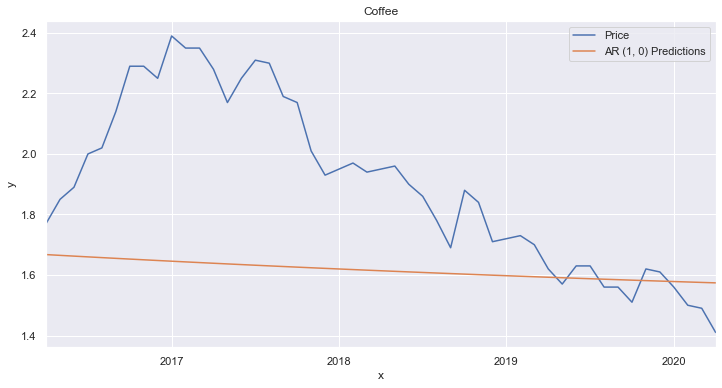

In [38]:
title = "Coffee"
ylabel="y"
xlabel="x"

ax=test.Price.plot(legend=True, figsize=(12,6), title=title)
# ax_train = train.Price.plot(legend=True)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [39]:
res_ARIMA = ARIMA(train.Price, order=(1,1,0)).fit()
predictions_ARIMA = res_ARIMA.predict(start=start, end=end, dynamic=False, typ="levels").rename("ARIMA (1, 1, 0) Predictions")

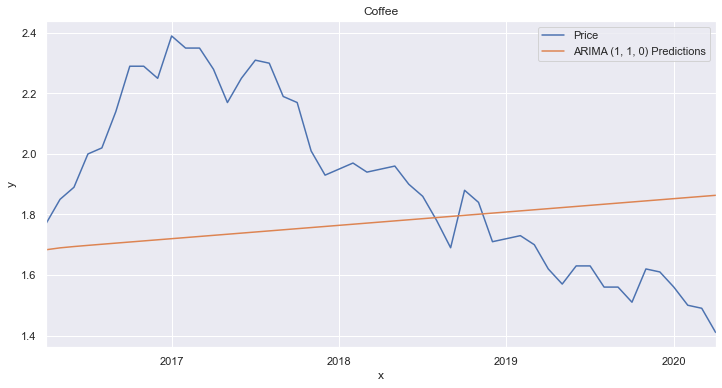

In [40]:
title = "Coffee"
ylabel="y"
xlabel="x"

ax=test.Price.plot(legend=True, figsize=(12,6), title=title)
predictions_ARIMA.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [43]:
AR_ms_error = mean_squared_error(test.Price, predictions)
ARIMA_ms_error = mean_squared_error(test.Price, predictions_ARIMA)
AR_rmse = rmse(test.Price, predictions)
ARIMA_rmse = rmse(test.Price, predictions_ARIMA)
print(f"Mse: \t AR(1,0): {AR_ms_error}, \t ARIMA(1,1,0): {ARIMA_ms_error}")
print(f"Rmse: \t AR(1,0): {AR_rmse}, \t ARIMA(1,1,0): {ARIMA_rmse}")

Mse: 	 AR(1,0): 0.1459762722917637, 	 ARIMA(1,1,0): 0.11897151353930095
Rmse: 	 AR(1,0): 0.38206841310394096, 	 ARIMA(1,1,0): 0.3449224746798923
